<a href="https://colab.research.google.com/github/daimessdn/colaboratory-notebook/blob/master/Basic_neural_network_(Python)_solving_flower_problems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline

In [0]:
import matplotlib.pyplot as plt
import numpy as np

In [0]:
# flower data
# [length, width, type (0 for blue or 1 for red)]
data = [[3  , 1.5, 1],
        [2  , 1  , 0],
        [4  , 1.5, 1],
        [3  , 1  , 0],
        [3.5, 0.5, 1],
        [2  , 0.5, 0],
        [5.5, 1  , 1],
        [1  , 1  , 0]]

mystery_flower = [4.5, 1]

In [0]:
data[1]

[2, 1, 0]

In [0]:
# network
#    o      flower type
#   / \     w1, w2, b
#  o   o    length, width

In [0]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def sigmoid_p(x):
  return sigmoid(x) * (1 - sigmoid(x))

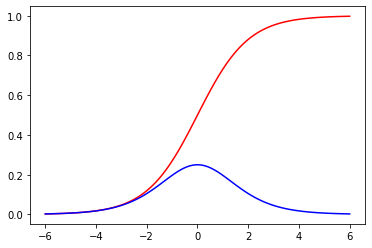

In [0]:
T = np.linspace(-6, 6, 100)
Y = sigmoid(T)
plt.plot(T, sigmoid(T), c='r')
plt.plot(T, sigmoid_p(T), c='b')

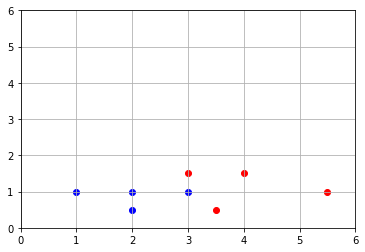

In [0]:
# scatter data

plt.axis([0, 6, 0, 6])
plt.grid()

for i in range(len(data)):
  point = data[i]
  color = 'r'
  
  if point[2] == 0:
    color = 'b'
  plt.scatter(point[0], point[1], c=color)

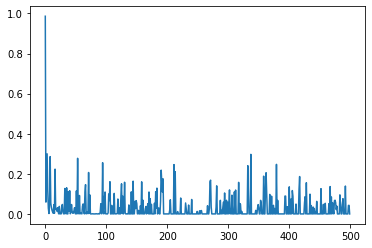

In [0]:
# training loop

learning_rate = 0.2
costs = []

w1 = np.random.randn()
w2 = np.random.randn()
b  = np.random.randn()

for i in range(50000):
  ri = np.random.randint(len(data))
  # print(ri)
  
  point = data[ri]
  # print(point)

  z = point[0] * w1 + point[1] * w2 + b
  pred = sigmoid(z)
  
  target = point[2]
  cost = np.square(pred - target)
  
  # costs.append(cost)
  
  # print(point)
  # if i % 100 == 0:
  #   print(cost)
  
  dcost_pred = 2 * (pred - target)
  dpred_dz = sigmoid_p(z)
  
  dz_dw1 = point[0]
  dz_dw2 = point[1]
  dz_db  = 1
  
  dcost_dz = dcost_pred * dpred_dz
  
  dcost_dw1 = dcost_dz * dz_dw1
  dcost_dw2 = dcost_dz * dz_dw2
  dcost_db  = dcost_dz * dz_db
  
  w1 = w1 - learning_rate * dcost_dw1
  w2 = w2 - learning_rate * dcost_dw2
  b  = b  - learning_rate * dcost_db
  
  cost_sum = 0
  
  if i % 100 == 0:
    for j in range(len(data)):
      p = data[ri]
      z = p[0] * w1 + p[1] * w2 + b
      pred = sigmoid(z)

      cost_sum += np.square(pred - target)
    costs.append(cost_sum/len(data))
  
plt.plot(costs)

In [0]:
# seeing model predictions

for i in range(len(data)):
  point = data[i]
  print(point)
  z = point[0] * w1 + point[1] * w2 + b
  pred = sigmoid(z)
  print("pred:  {}".format(pred))

[3, 1.5, 1]
pred:  0.8367800701490156
[2, 1, 0]
pred:  0.0009413811796257528
[4, 1.5, 1]
pred:  0.9998219814359603
[3, 1, 0]
pred:  0.5079396745040483
[3.5, 0.5, 1]
pred:  0.8730889502631133
[2, 0.5, 0]
pred:  0.00018969146763312468
[5.5, 1, 1]
pred:  0.9999999756130163
[1, 1, 0]
pred:  8.601118302577658e-07


In [0]:
z = mystery_flower[0] * w1 + mystery_flower[1] * w2 + b
pred = sigmoid(z)
pred

0.999973284350222

In [0]:
import os

In [0]:
os.system('ls -l')

0

In [0]:
def which_flower(length, width):
  z = length * w1 + width * w2 + b
  pred = sigmoid(z)
  if pred < 0.5:
    os.system("say blue")
    print("blue")
  else:
    os.system("say red")
    print("red")

In [0]:
which_flower(mystery_flower[0], mystery_flower[1])

red


In [0]:
which_flower(0, 0)

blue
